In [250]:
import numpy as np
import pandas as pd

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [288]:
import warnings
import random
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors  import LocalOutlierFactor
from pylab import rcParams
rcParams ['figure.figsize'] = 14,8
Random_State = 42


In [ ]:
### DATA EXPLORATION AND PREPROCESSING##

In [159]:
data = pd.read_csv("/content/creditcard_2023.csv")


In [180]:
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0,0.858447,0.858447
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0,-0.796369,-0.796369
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0,-1.377011,-1.377011
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0,-0.962119,-0.962119
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0,0.323285,0.323285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,1,-1.105231,-1.105231
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,1,-1.067766,-1.067766
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,1,1.666401,1.666401
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,1,-0.271853,-0.271853


In [5]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4005 non-null   int64  
 1   V1      4005 non-null   float64
 2   V2      4005 non-null   float64
 3   V3      4005 non-null   float64
 4   V4      4005 non-null   float64
 5   V5      4005 non-null   float64
 6   V6      4005 non-null   float64
 7   V7      4005 non-null   float64
 8   V8      4005 non-null   float64
 9   V9      4005 non-null   float64
 10  V10     4005 non-null   float64
 11  V11     4005 non-null   float64
 12  V12     4005 non-null   float64
 13  V13     4005 non-null   float64
 14  V14     4005 non-null   float64
 15  V15     4005 non-null   float64
 16  V16     4005 non-null   float64
 17  V17     4005 non-null   float64
 18  V18     4005 non-null   float64
 19  V19     4005 non-null   float64
 20  V20     4005 non-null   float64
 21  V21     4005 non-null   float64
 22  

In [7]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,...,4005.000000,4005.000000,4005.000000,4005.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000
mean,2002.000000,0.223587,-0.369992,1.081085,-0.733719,0.306135,0.467394,0.529997,-0.159611,0.599367,...,-0.106956,-0.099524,-0.075374,0.185648,0.084788,-0.105288,-0.166061,-0.095387,12006.126076,0.000500
std,1156.288243,0.563979,0.441515,0.651107,0.718368,0.508767,0.683668,0.694944,0.243057,0.616325,...,0.326562,0.577171,0.387062,1.121987,0.660531,1.139041,0.399057,0.613991,6929.687067,0.022347
min,0.000000,-1.627748,-8.544918,-1.420525,-3.996094,-4.298320,-4.816992,-1.500230,-4.074350,-0.968912,...,-5.670307,-4.363603,-6.620316,-3.235133,-3.523117,-3.733169,-3.997380,-7.262726,50.530000,0.000000
25%,1001.000000,-0.170892,-0.496931,0.622864,-1.110263,0.051592,0.037877,0.342622,-0.198389,0.231050,...,-0.190150,-0.500839,-0.233643,-0.575273,-0.315508,-0.813108,-0.286111,-0.150875,6017.930000,0.000000
50%,2002.000000,0.015815,-0.310104,1.002065,-0.578003,0.219502,0.353083,0.489801,-0.146165,0.517432,...,-0.125475,-0.105995,-0.093812,0.231836,0.091866,-0.033236,-0.199402,-0.049147,11772.035000,0.000000
75%,3003.000000,0.888206,-0.151762,1.430065,-0.223041,0.418725,0.726771,0.675522,-0.083632,0.920870,...,-0.062582,0.280651,0.039212,0.917520,0.512546,0.640665,0.005442,0.108852,18045.822500,0.000000
max,4004.000000,1.423966,1.175983,4.324138,1.170756,8.773367,9.295606,37.922674,0.851832,6.852978,...,4.868825,4.760100,4.778495,2.751773,2.939795,5.555557,6.550638,9.736378,24027.340000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4005 non-null   int64  
 1   V1      4005 non-null   float64
 2   V2      4005 non-null   float64
 3   V3      4005 non-null   float64
 4   V4      4005 non-null   float64
 5   V5      4005 non-null   float64
 6   V6      4005 non-null   float64
 7   V7      4005 non-null   float64
 8   V8      4005 non-null   float64
 9   V9      4005 non-null   float64
 10  V10     4005 non-null   float64
 11  V11     4005 non-null   float64
 12  V12     4005 non-null   float64
 13  V13     4005 non-null   float64
 14  V14     4005 non-null   float64
 15  V15     4005 non-null   float64
 16  V16     4005 non-null   float64
 17  V17     4005 non-null   float64
 18  V18     4005 non-null   float64
 19  V19     4005 non-null   float64
 20  V20     4005 non-null   float64
 21  V21     4005 non-null   float64
 22  

In [9]:
data.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [162]:
data['Class'].value_counts()

,count
Class,
0,284315
1,284315


In [ ]:
# EXPLORATORY DATA ANALYSIS #

In [25]:
data. isnull().values.any()

True

In [53]:
LABELS = ["Normal", "Fraud"]

In [114]:
fraud = data[data['Class']==1]
normal = data [data['Class']==0]

In [115]:
fraud.shape

(2, 31)

In [116]:
normal.shape

(4002, 31)

In [117]:
fraud.Amount.describe()

,Amount
count,2.000000
mean,6044.605000
std,6378.209232
min,1534.530000
25%,3789.567500
50%,6044.605000
75%,8299.642500
max,10554.680000


In [118]:
normal.Amount.describe()

,Amount
count,4002.000000
mean,12009.105347
std,6929.402931
min,50.530000
25%,6023.997500
50%,11773.400000
75%,18048.927500
max,24027.340000


Text(0, 0.5, 'Frequency')

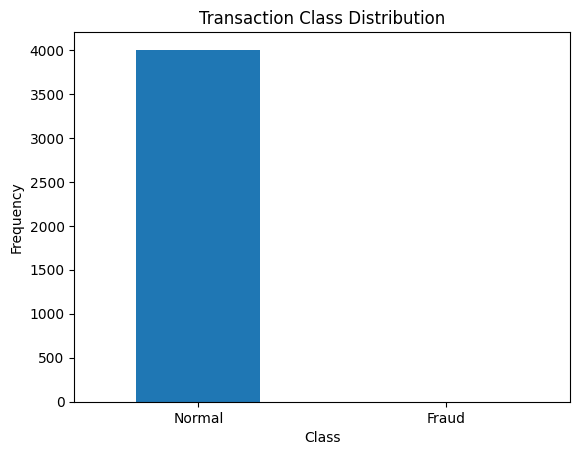

In [96]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

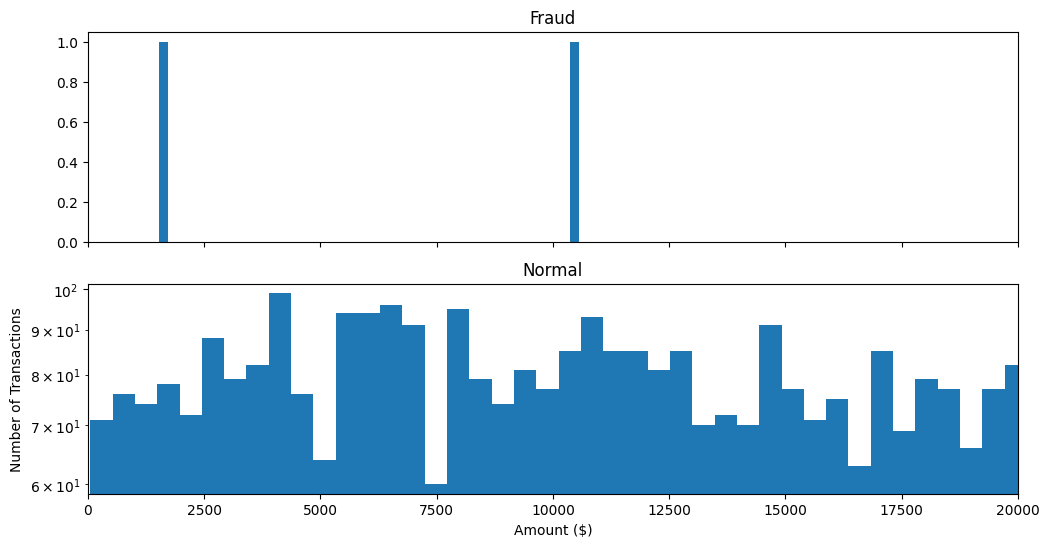

In [97]:
f, (a1,a2)= plt.subplots(2, 1, sharex=True , figsize=(12,6))
bins = 50
a1.hist(fraud.Amount, bins = bins)
a1.set_title('Fraud')
a2.hist(normal.Amount, bins = bins)
a2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show();

In [109]:
# sample data of the data##
data.shape


(4005, 31)

In [149]:
data = data.sample(frac=0.1, random_state=1)
data.shape

(40, 31)

In [150]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data[data['Class']==1]

Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [151]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))


0.0
Fraud Cases : 0
Valid Cases : 40


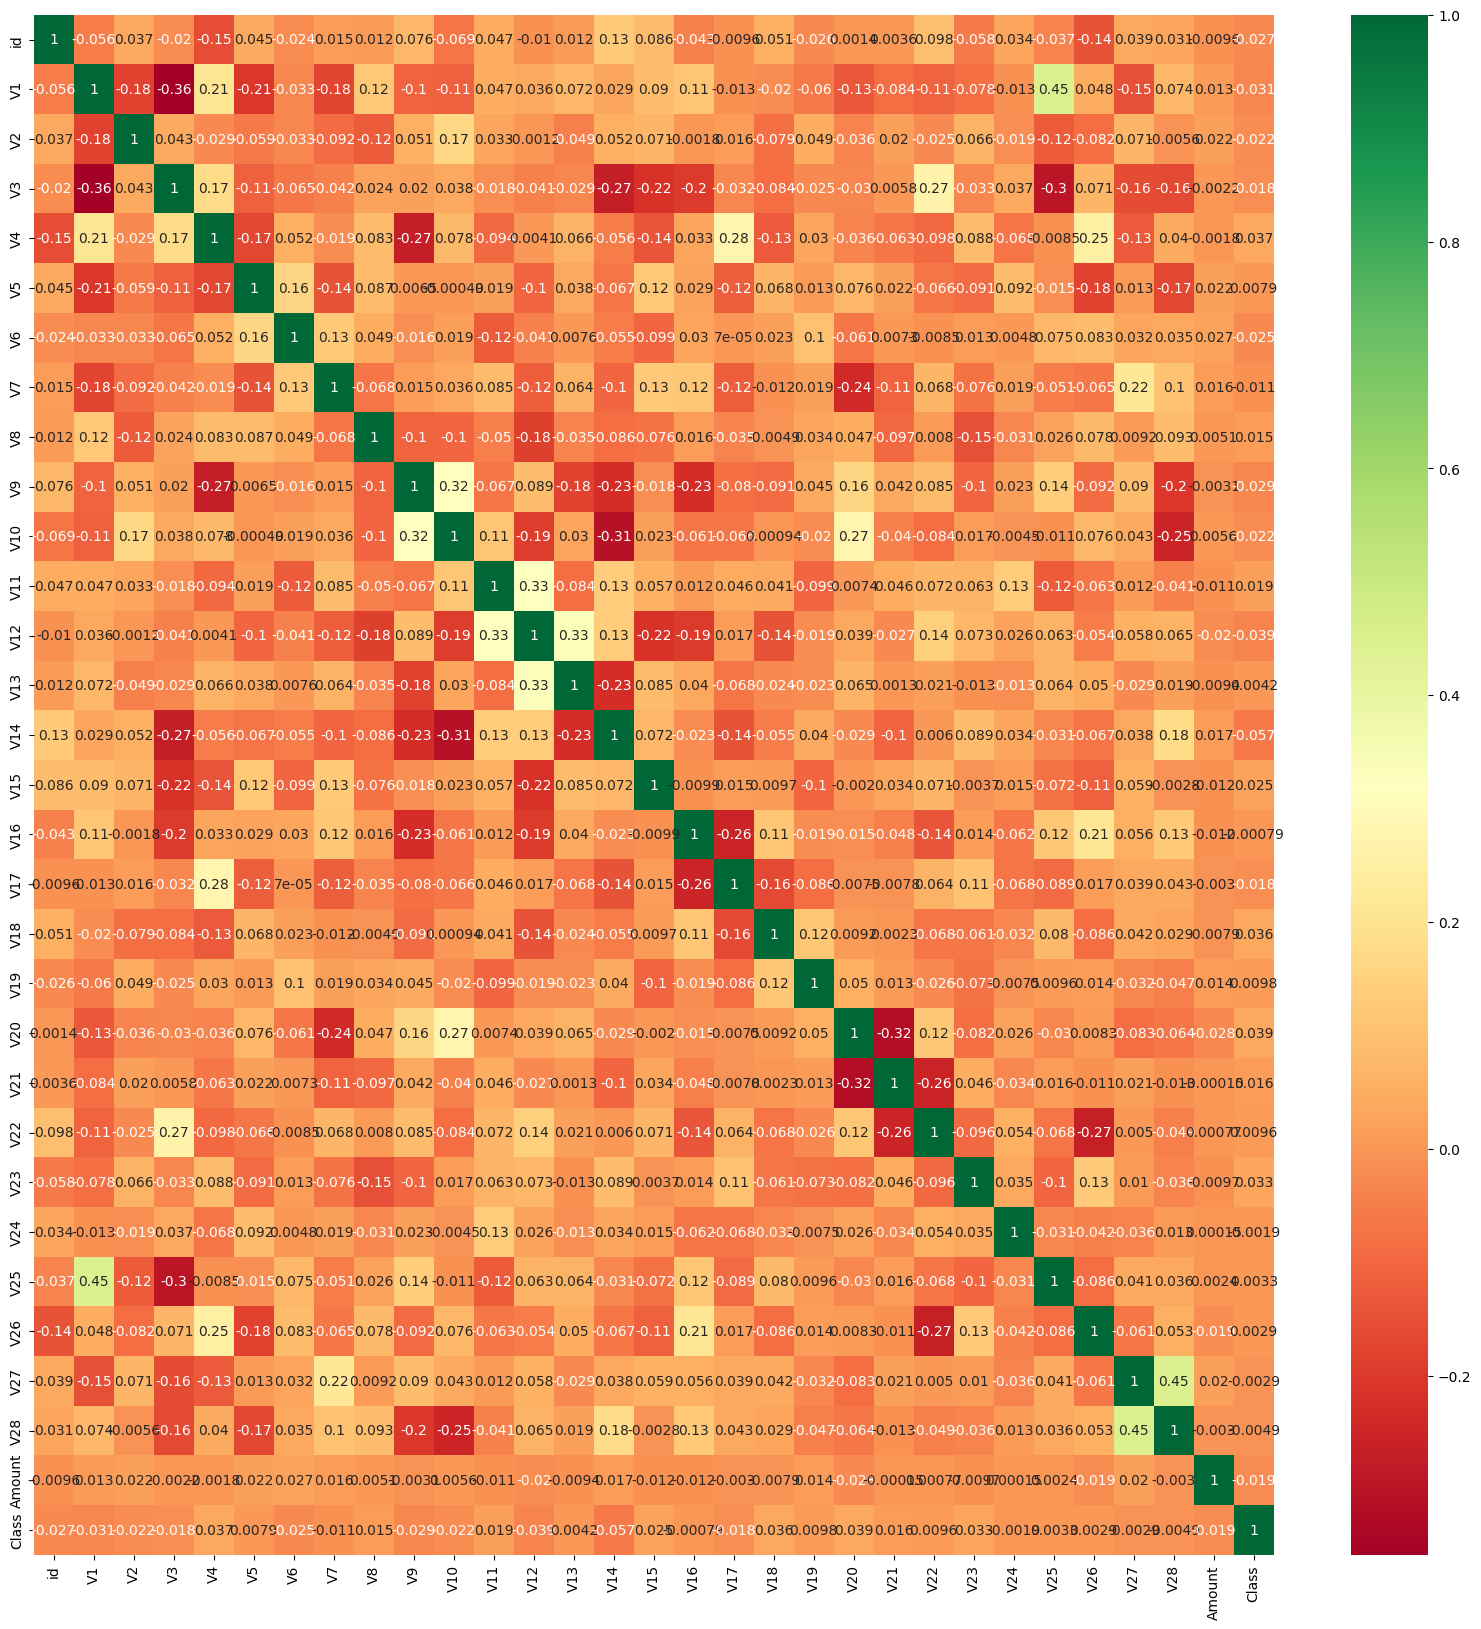

In [113]:
## Corelation
import seaborn as sns
corrmat = data.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(), annot=True,cmap="RdYlGn")


In [269]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
# Define random state
state = np.random.RandomState(42)
x = data[columns]
y = data[target]
x_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x_outliers)
print(x_outliers.shape)


[[0.37454012 0.95071431 0.73199394 ... 0.59241457 0.04645041 0.60754485]
 [0.17052412 0.06505159 0.94888554 ... 0.32533033 0.38867729 0.27134903]
 [0.82873751 0.35675333 0.28093451 ... 0.11959425 0.71324479 0.76078505]
 ...
 [0.92212656 0.23166811 0.14251482 ... 0.57524491 0.31730839 0.56134695]
 [0.2893556  0.14894867 0.15614178 ... 0.63212681 0.21772872 0.96972173]
 [0.50613598 0.2749811  0.41197201 ... 0.52945918 0.02270301 0.35666765]]
(568630, 31)


In [270]:
print(x.shape)
print(y.shape)

(568630, 31)
(568630,)


In [161]:
data = pd.read_csv("/content/creditcard_2023.csv")

In [186]:
# Handle class imbalance using SMOTE
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
### MODEL DEVELOPMENT (SUPERVISED MODELS)

In [194]:

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_resampled, y_resampled)
logistic_pred = logistic_model.predict(X_test)

In [196]:
## XGBOOST MODEL
xgb_model = XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
## EVALUATION OF SUPERVISED MODELS

In [197]:
print("Logistic Regression Metrics:")
print(classification_report(y_test, logistic_pred))
print("XGBoost Metrics:")
print(classification_report(y_test, xgb_pred))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

XGBoost Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
## MODEL DEVELOPMENT(UNSUPERVISED MODELS)

In [229]:
iso_model = IsolationForest(contamination=0.01, random_state=42)
iso_model.fit(X_train)
Anomalies = iso_model.predict(X_test)

In [245]:

Anamolies = [1 if x == -1 else 0 for x in Anomalies]
print("Anamolies Detected:")
print(classification_report(y_test, Anomalies))

Anamolies Detected:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     56750
           1       0.50      0.98      0.66     56976

    accuracy                           0.49    113726
   macro avg       0.17      0.33      0.22    113726
weighted avg       0.25      0.49      0.33    113726



In [ ]:
# Model Evaluation###

In [260]:
confusion_matrix = confusion_matrix(y_test, logistic_pred)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix)



Logistic Regression Confusion Matrix:
[[56642   108]
 [  128 56848]]


In [263]:
confusion_matrix = confusion_matrix(y_test, xgb_pred)
print("confusion matrix XGBoost:")
print(confusion_matrix)

confusion matrix XGBoost:
[[56745     5]
 [   15 56961]]


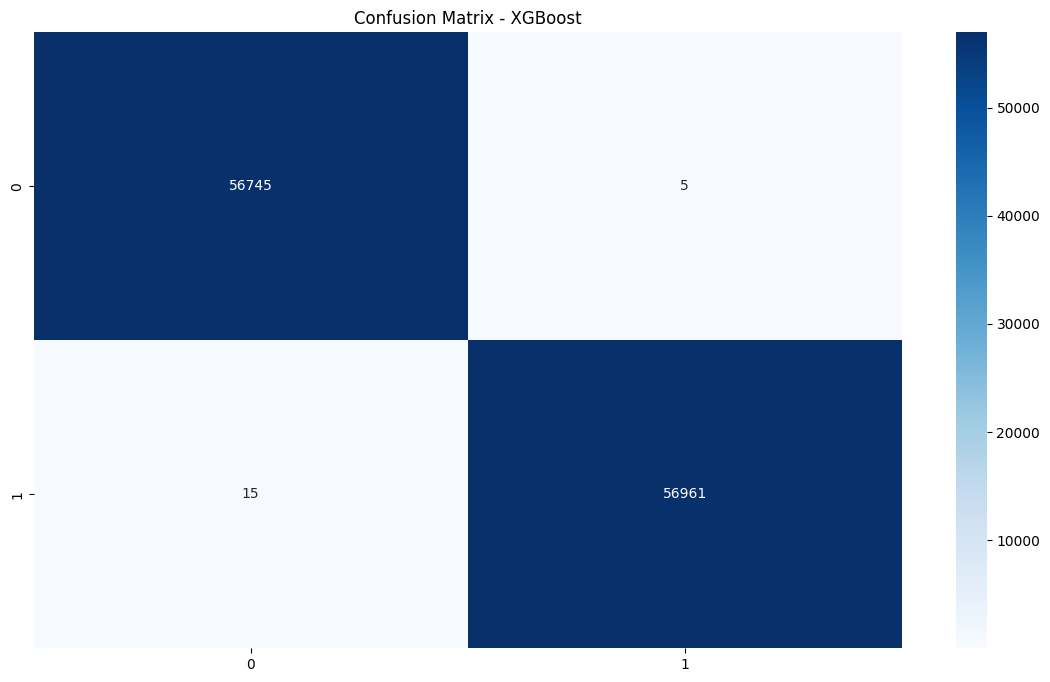

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn. metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix - XGBoost')
plt.show()


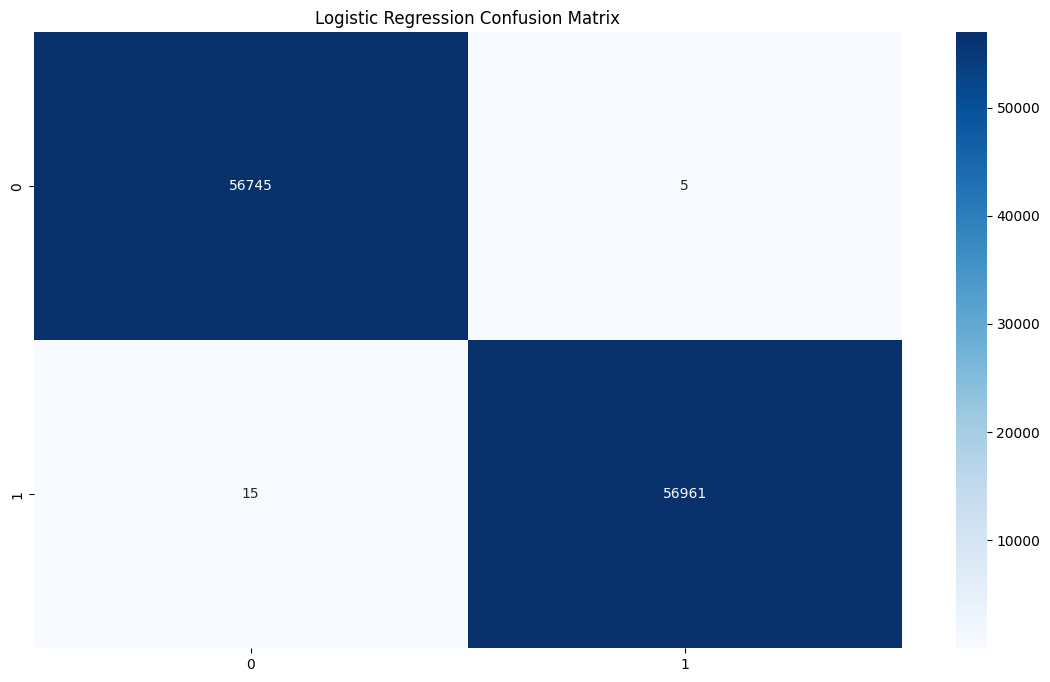

Logistic Regression Confusion Matrix:
[[56642   108]
 [  128 56848]]


In [266]:
confusion_matrix = confusion_matrix(y_test, logistic_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Logistic Regression Confusion Matrix')
plt.show()

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix)

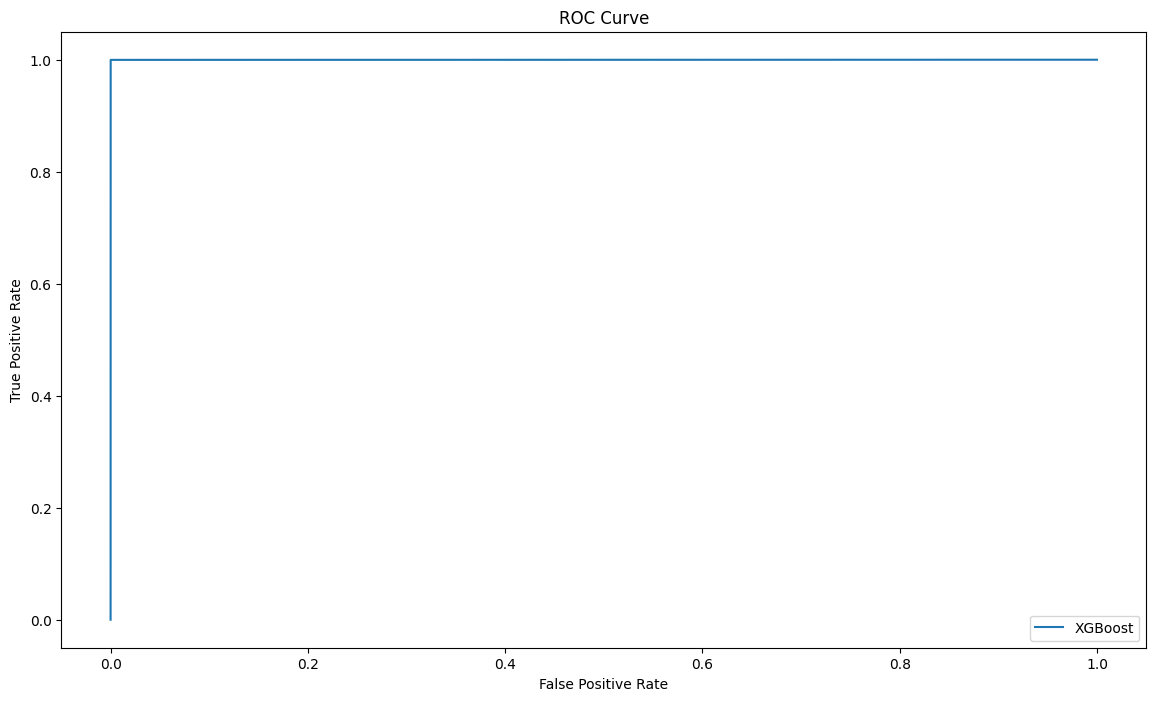

In [285]:
# MODEL EVLUATION##
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr, tpr, label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
## explainability ###

In [278]:

import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split


In [281]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


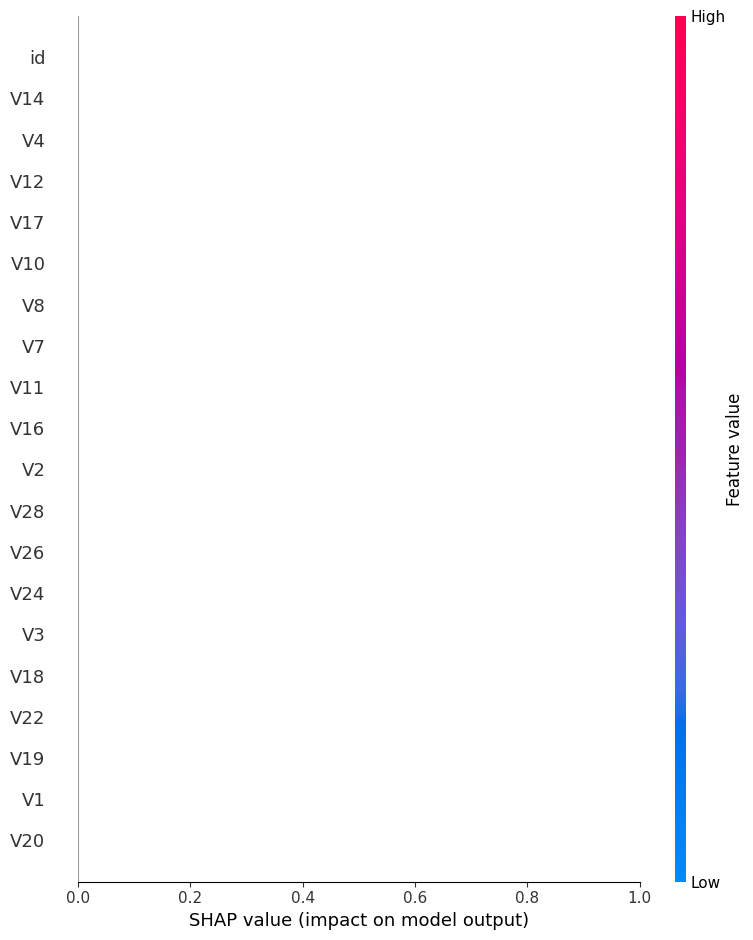

In [283]:
shap.summary_plot(shap_values, X_test, plot_type="bar)")